# STA 141B: Homework 5
Winter 2018

## Student Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name:

Last Name: 

Student ID: 

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

# Housing data

In this assignment, you'll analyze a collection of data sets from the [San Francisco Open Data Portal](http://data.sfgov.org/) and [Zillow](https://www.zillow.com/). The data sets have been stored in the SQLite database `sf_data.sqlite`, which you can [download here](http://anson.ucdavis.edu/~nulle/sf_data.sqlite). The database contains the following tables:

Table                   | Description
----------------------- | -----------
`crime`                 | Crime reports dating back to 2010.
`mobile_food_locations` | List of all locations where mobile food vendors sell.
`mobile_food_permits`   | List of all mobile food vendor permits. More details [here](https://data.sfgov.org/api/views/rqzj-sfat/files/8g2f5RV4PEk0_b24iJEtgEet9gnh_eA27GlqoOjjK4k?download=true&filename=DPW_DataDictionary_Mobile-Food-Facility-Permit.pdf).
`mobile_food_schedule`  | Schedules for mobile food vendors.
`noise`                 | Noise complaints dating back to August 2015.
`parking`               | List of all parking lots.
`parks`                 | List of all parks.
`schools`               | List of all schools.
`zillow`                | Zillow rent and housing statistics dating back to 1996. More details [here](https://www.zillow.com/research/data/).

The `mobile_food_` tables are explicitly connected through the `locationid` and `permit` columns. The other tables are not connected, but you may be able to connect them using dates, latitude/longitude, or postal codes.

Shapefiles for US postal codes are available [here](https://www.census.gov/geo/maps-data/data/cbf/cbf_zcta.html). These may be useful for converting latitude/longitude to postal codes.

Shapefiles for San Francisco Neighborhoods are available [here](https://data.sfgov.org/Geographic-Locations-and-Boundaries/SF-Find-Neighborhoods/pty2-tcw4).

In [1]:
#Reading data into Jupyter Notebook
#Using the sqlalchemy package to import the SQL database format
#Connect to the database using sqlite and sqlalchemy
import sqlite3 as sql
import sqlalchemy as sqla
import pandas as pd


In [2]:
#Create object to hold the database URL
url = '/Users/victoriaanorve/Downloads/sf_data.sqlite'

In [3]:
#Use create_engine() to connect to the databases 

from sqlalchemy import create_engine

data1 = sqla.create_engine('sqlite:///' + url)
pd.read_sql("SELECT * FROM crime", data1).head()

,IncidntNum,Category,Descript,DayOfWeek,Datetime,PdDistrict,Resolution,Address,Lon,Lat
0,150060275,NON-CRIMINAL,LOST PROPERTY,Monday,2015-01-19 14:00:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.421582,37.761701
1,150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,2015-02-01 15:45:00,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191
2,150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,2015-02-01 15:45:00,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191
3,150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,2015-02-01 15:45:00,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191
4,150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,2015-01-27 19:00:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431119,37.800469


__Exercise 1.1.__ (20 pts) Which mobile food vendor(s) sells at the most locations?

In [4]:
#To find the mobile food vendor(s) who sell at the most locations, we will be using three tables: mobile_food_locations,
#mobile_food_permits_, and mobile_food_schedule

#pd.read_sql("SELECT * FROM mobile_food_locations", data1).head()

#pd.read_sql("SELECT * FROM mobile_food_permits", data1).head()

#pd.read_sql("SELECT * FROM mobile_food_schedule", data1).head()

#

In [5]:
pd.read_sql("SELECT Applicant, count(Applicant) AS Approved_Permits FROM mobile_food_permits AS mfp "
            "INNER JOIN (SELECT DISTINCT locationid, permit FROM mobile_food_schedule) "
            "AS mfs ON mfp.permit=mfs.permit WHERE mfp.Status=='APPROVED' GROUP BY mfp.Applicant "
            "ORDER BY Approved_Permits DESC LIMIT 5",data1)

,Applicant,Approved_Permits
0,Park's Catering,23
1,D & T Catering,17
2,F & C Catering,13
3,Munch A Bunch,10
4,Eva's Catering,8


In [6]:
#Upon using the inner join function in SQL, I was able to ascertain that Park's Catering sold the most food at 
#locations. The Approved permits gives the catering company the freedom to sell food at different locations.
#Thus, with 23 approved permits, Park's Catering was the most sucessful in selling at the most locations, as a result
#of it having the highest amount of approved permits. The more approved permits, the higher number of mobile food vendors
#for the catering company can be allowed. 

__Exercise 1.2.__ (40 pts) Ask and use the database to analyze 5 questions about San Francisco. For each question, write at least 150 words and support your answer with plots. Make a map for at least 2 of the 5 questions.

You should try to come up with some questions on your own, but these are examples of reasonable questions:

* Which parts of the city are the most and least expensive?
* Which parts of the city are the most dangerous (and at what times)?
* Are noise complaints and mobile food vendors related?
* What are the best times and places to find food trucks?
* Is there a relationship between housing prices and any of the other tables?

Please make sure to clearly state each of your questions in your submission.

In [7]:
#Which parts of the city are the most and least expensive?
#To determine which parts of the city are the most and least expensive, I will be using the zillow data
#to get an estimate of the median prices selling in San Francisco. Additionally, in order to determine 
#which region these homes fall, I will be using the zip codes to determine which neighborhoods have the 
#the highest and lowest median prices. I am assuming that the areas with the highest density of individuals
#will be more expensive, such as downtown or the financial district, as they are central hubs. 
#Thus, to determine which parts of the city are the most and least expensive, I will be comparing the price 
#of the house to its zip code. 

In [8]:
#First, we take a look at the zillow data to see which variables are are in the data  
pd.read_sql("SELECT max(MedianSoldPricePerSqft_AllHomes) FROM zillow", data1).head()

,max(MedianSoldPricePerSqft_AllHomes)
0,1336.128581


In [9]:
pd.read_sql("SELECT min(MedianSoldPricePerSqft_AllHomes) FROM zillow", data1).head()

,min(MedianSoldPricePerSqft_AllHomes)
0,103.938


In [10]:
pd.read_sql("SELECT avg(MedianSoldPricePerSqft_AllHomes) FROM zillow", data1).head()

,avg(MedianSoldPricePerSqft_AllHomes)
0,525.730531


In [11]:
#Before we begin to begin to analyze the data further I computed the maximumn, minimum and average prices for 
#homes in San Francisco. This is important as it gives us an idea of the range of house prices. 

In [12]:
#Find the median Price of San Francsico homes 
zip_code_prices = pd.read_sql("SELECT RegionName, MedianSoldPricePerSqft_AllHomes FROM zillow WHERE MedianSoldPricePerSqft_AllHomes > 0 "
                              "GROUP BY RegionName ORDER BY MedianSoldPricePerSqft_AllHomes", data1)
                              

In [13]:
#Begin Plotting
#Importing module
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")


In [14]:
#Change
plot_zip_code = zip_code_prices.sort_values( by = "MedianSoldPricePerSqft_AllHomes", axis = 0, ascending = True,
                                           inplace = False, kind = 'quicksort', na_position = 'last')

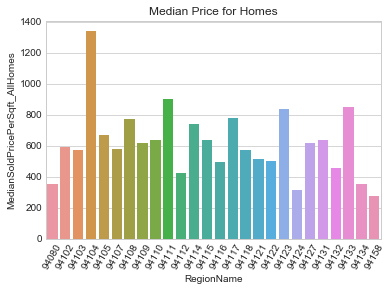

In [15]:
#Change asthetics
plot = sns.barplot(x = "RegionName", y = "MedianSoldPricePerSqft_AllHomes", data = plot_zip_code, label = "Total")

for item in plot.get_xticklabels():
    item.set_rotation(60)
plt.title("Median Price for Homes")
plt.show()

In [16]:
#Now lets graph the Median price of the homes according to their zip code 
zip_code_prices = pd.read_sql("SELECT RegionName, MedianSoldPricePerSqft_AllHomes FROM zillow WHERE MedianSoldPricePerSqft_AllHomes > 0 "
                              "GROUP BY RegionName ORDER BY MedianSoldPricePerSqft_AllHomes", data1)

In [17]:
plot_zip_code = zip_code_prices.sort_values( by = "MedianSoldPricePerSqft_AllHomes", axis = 0, ascending = True,
                                           inplace = False, kind = 'quicksort', na_position = 'last')

In [18]:
highest_values = plot_zip_code.iloc[:3]
lowest_values = plot_zip_code.iloc[-3:]
data_frame = highest_values.append(lowest_values)
data_frame

,RegionName,MedianSoldPricePerSqft_AllHomes
0,94158,273.033708
1,94124,312.412600
2,94134,351.758200
23,94133,850.666667
24,94111,901.804100
25,94104,1336.128581


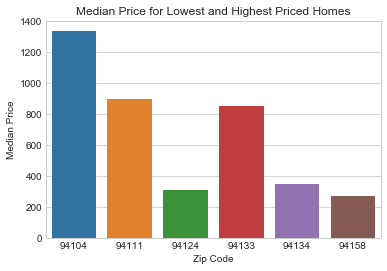

In [19]:
#Change asethetics slightly.
#Now graph these results
graph_zip = sns.barplot(x = "RegionName", y = "MedianSoldPricePerSqft_AllHomes", data = data_frame, label = "Total")
plt.ylabel("Median Price")
plt.xlabel("Zip Code")
plt.title("Median Price for Lowest and Highest Priced Homes")
plt.show()

In [20]:
#Conclusion
#It is evident that the area code, 94104 has the highest median price for homes in San Francisco 
#If we look up this zip code on a map, we notice that 

In [21]:
#Geopanda map

import matplotlib.pyplot as plt
import pandas as pd

import geopandas as gpd         
import osmnx as ox              
import shapely.geometry as geom

In [22]:
#I am using stackoverflow mostly for this question. I used segments of Nick's code, but I mostly found some helpful
#tools online

#Shape file
#This this data set, we notice that the column labeled, "ZCTA5CE10" serves as the identification for the entire 
#US postal system
#In the cell below, I identify the zip codes that begin with 9, as that refers to the San Francisco area
zip_codes = gpd.read_file("/Users/victoriaanorve/Downloads/cb_2016_us_zcta510_500k/cb_2016_us_zcta510_500k.shp")
zip_codes.head()

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
0,21914,8600000US21914,21914,1924479,477175,"POLYGON ((-75.99444799999999 39.567742, -75.99..."
1,01001,8600000US01001,01001,29731610,2118827,"POLYGON ((-72.667677 42.045022, -72.657715 42...."
2,34736,8600000US34736,34736,322808220,78588518,"(POLYGON ((-81.806163 28.568643, -81.801577999..."
3,46151,8600000US46151,46151,530632048,9804480,"(POLYGON ((-86.398562 39.320829, -86.398125999..."
4,48039,8600000US48039,48039,59592687,4845242,"POLYGON ((-82.61060000000001 42.724669, -82.51..."


In [23]:
#Now subset the zip codes 
#We specifically look at the area codes that begin with 9
zip_SF = zip_codes[zip_codes.ZCTA5CE10.str.startswith("9")]
zip_SF.head()

#We now only have the SF postal zip codes 

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
25,97365,8600000US97365,97365,109806917,6824094,"POLYGON ((-124.079249 44.6772, -124.0774751021..."
26,97862,8600000US97862,97862,711973557,47030,"POLYGON ((-118.6983 45.93671399999999, -118.69..."
42,98146,8600000US98146,98146,12047560,1758214,"POLYGON ((-122.39586529922 47.51376729164519, ..."
55,99574,8600000US99574,99574,6406176482,768254012,"(POLYGON ((-145.731377 60.62051, -145.729119 6..."
56,99830,8600000US99830,99830,703636442,421008566,"(POLYGON ((-133.797239 56.810756, -133.791772 ..."


In [24]:
#This is taken from stackoverflow 
desired = [str(x) for x in zip_code_prices["RegionName"].values]
zip_SF = zip_SF.loc[zip_SF["ZCTA5CE10"].isin(set(desired))]


In [25]:
#Put zipcodes to the data frame
zip_SF["RegionName"] = zip_SF["ZCTA5CE10"]
zip_SF = zip_SF.reset_index().sort_values(by = "RegionName")

In [26]:
#Only do certain columns
zip_SF = zip_SF[["RegionName", "geometry"]].reset_index(drop = True)

In [27]:
zip_code_prices = zip_code_prices.reset_index(drop = True).sort_values(by = "RegionName")

In [28]:
#Heatmap

heat_map = pd.concat([zip_SF, zip_code_prices["MedianSoldPricePerSqft_AllHomes"]], axis = 1)
heat_map.head()

,RegionName,geometry,MedianSoldPricePerSqft_AllHomes
0,94080,"POLYGON ((-122.469009 37.650404, -122.458997 3...",273.033708
1,94102,"POLYGON ((-122.429929 37.777909, -122.426829 3...",312.412600
2,94103,"POLYGON ((-122.426418 37.765784, -122.426402 3...",351.758200
3,94104,"POLYGON ((-122.404613 37.793565, -122.401315 3...",353.344500
4,94105,"POLYGON ((-122.403456 37.787776, -122.401939 3...",422.827400


In [29]:
zip_SF
#zip_code_prices

,RegionName,geometry
0,94080,"POLYGON ((-122.469009 37.650404, -122.458997 3..."
1,94102,"POLYGON ((-122.429929 37.777909, -122.426829 3..."
2,94103,"POLYGON ((-122.426418 37.765784, -122.426402 3..."
3,94104,"POLYGON ((-122.404613 37.793565, -122.401315 3..."
4,94105,"POLYGON ((-122.403456 37.787776, -122.401939 3..."
5,94107,"POLYGON ((-122.40509 37.76462799999999, -122.4..."
6,94108,"POLYGON ((-122.414826 37.794988, -122.404412 3..."
7,94109,"POLYGON ((-122.432565 37.80848, -122.432079 37..."
8,94110,"POLYGON ((-122.426722 37.736372, -122.425082 3..."
9,94111,"POLYGON ((-122.405922 37.806462, -122.403494 3..."


/Users/victoriaanorve/anaconda3/envs/geotest/lib/python3.6/site-packages/geopandas/plotting.py:381: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


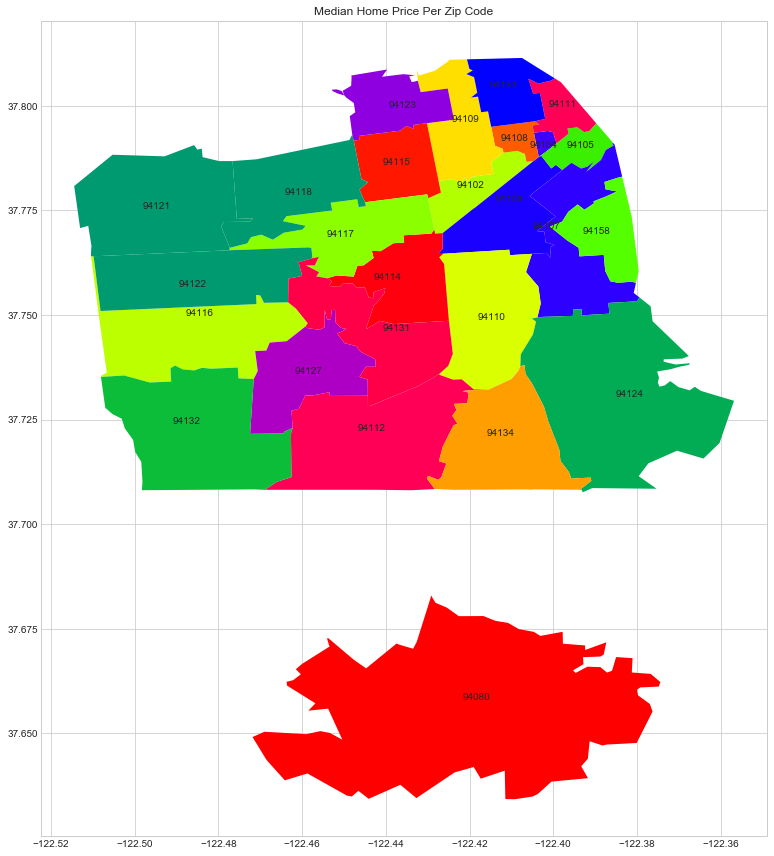

In [30]:
#delete treasure island 


ax = heat_map.plot(column = 'MedianSoldPricePerSqft_AllHomes', colormap = "prism",figsize=(15,15))
plt.title("Median Home Price Per Zip Code")


def add_label(row):
    coords = row.geometry.representative_point().coords[0]
    ax.annotate(row["RegionName"], xy = coords, horizontalalignment = "center")

#add_label() on each row.
heat_map.apply(add_label, axis = 1)


plt.show()

In [31]:
#The zip codes in the blue are the most expensive 

In [32]:
#1.2 Which parts of the city are the most dangeous(and at what times)?
crimes = pd.read_sql("SELECT * FROM crime", data1)
crimes.head()

,IncidntNum,Category,Descript,DayOfWeek,Datetime,PdDistrict,Resolution,Address,Lon,Lat
0,150060275,NON-CRIMINAL,LOST PROPERTY,Monday,2015-01-19 14:00:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.421582,37.761701
1,150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,2015-02-01 15:45:00,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191
2,150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,2015-02-01 15:45:00,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191
3,150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,2015-02-01 15:45:00,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191
4,150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,2015-01-27 19:00:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431119,37.800469


In [33]:
#Upon looking at the data, we want to get the data into strftime 
#Look at %H -- Hour (24-hour clock) as a zero-padded decimal number
#Also want to count the number of districts 

crime_time = pd.read_sql(
    """
    SELECT Lon, Lat, PdDistrict, strftime('%H', Datetime) as 'Hour', COUNT(*) as 'PdDistCount'
        FROM crime
        WHERE PdDistrict IS NOT NULL
        GROUP BY PdDistrict, strftime('%H', Datetime)
        ORDER BY COUNT(*)
        DESC
    """
, data1)
    
            


In [34]:
crime_time.head()

,Lon,Lat,PdDistrict,Hour,PdDistCount
0,-122.394943,37.791842,SOUTHERN,18,13422
1,-122.402836,37.786801,SOUTHERN,17,12901
2,-122.403405,37.775421,SOUTHERN,19,12445
3,-122.403405,37.775421,SOUTHERN,16,11576
4,-122.421619,37.773434,SOUTHERN,12,11108


In [35]:
#Taken from Nick's notes 
#Make a shapely Point for each row
lnglat = [geom.Point(x) for x in zip(crime_time.Lon, crime_time.Lat)]
SF_geom = gpd.read_file("geo_export_4e3d287a-f8ca-470a-a8e7-c1c4ccdd3976.shp")
crime_geo= gpd.GeoDataFrame(crime_time, geometry = lnglat)
crime_geo.head()


,Lon,Lat,PdDistrict,Hour,PdDistCount,geometry
0,-122.394943,37.791842,SOUTHERN,18,13422,POINT (-122.394943493875 37.7918424690001)
1,-122.402836,37.786801,SOUTHERN,17,12901,POINT (-122.402835528142 37.78680090283839)
2,-122.403405,37.775421,SOUTHERN,19,12445,POINT (-122.403404791479 37.775420706711)
3,-122.403405,37.775421,SOUTHERN,16,11576,POINT (-122.403404791479 37.775420706711)
4,-122.421619,37.773434,SOUTHERN,12,11108,POINT (-122.421619493654 37.773433937273)


[Text(66.375,0.5,'Long'),
 Text(0.5,188.213,'Lat'),
 Text(0.5,1,'Location of Districts ')]

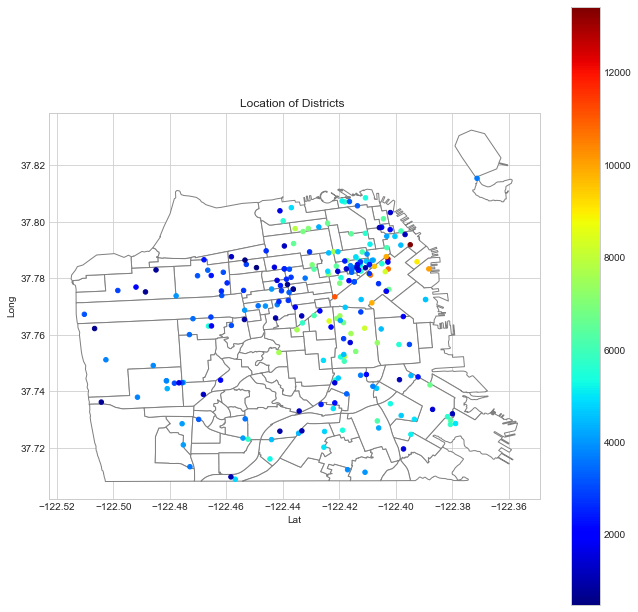

In [36]:
ax = SF_geom.plot(color = "white", edgecolor = "gray", figsize = (11,11))
crime_geo.plot(ax = ax, column = "PdDistCount", cmap = "jet", markersize = 20, legend = True)
ax.set(xlabel = 'Lat', ylabel = 'Long', title = 'Location of Districts ')



In [37]:
#1.3 How do crime rates fair in the San Francisco?
#In this problem, I will be taking a closer look at the "Assaults 

In [38]:
noise = pd.read_sql("SELECT * FROM noise", data1)

In [39]:
noise["year"]=pd.DatetimeIndex(noise.Datetime).year
noise["month"]=pd.DatetimeIndex(noise.Datetime).month

In [40]:
nhood_counts=noise.groupby(["Neighborhood"]).agg('count').iloc[:,0].reset_index().sort_values("CaseID")
nhood_counts=nhood_counts.loc[nhood_counts["CaseID"]>=100,:]

In [50]:
from matplotlib import pyplot

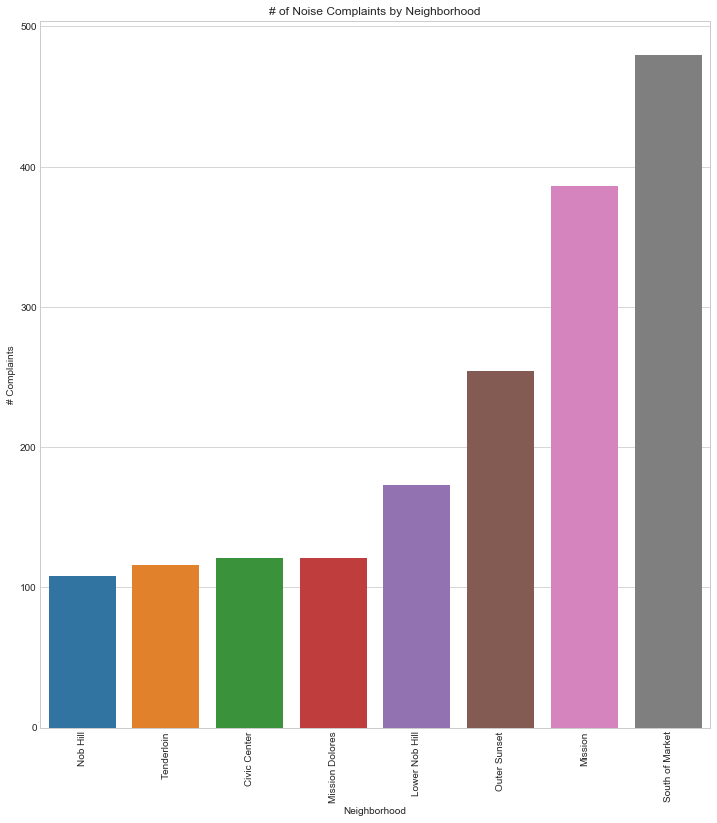

In [51]:
dims = (12, 13)

fig, ax = pyplot.subplots(figsize=dims)

#seaborn.violinplot(ax=ax, data=df, **violin_options)
plotComplaintsbyRegion = sns.barplot(ax = ax, x = 'Neighborhood',y= 'CaseID',data = nhood_counts)
plotComplaintsbyRegion.set(title = "# of Noise Complaints by Neighborhood",ylabel = "# Complaints", xlabel = "Neighborhood")
plotComplaintsbyRegion.set_xticklabels(plotComplaintsbyRegion.get_xticklabels(),rotation=90)
plt.show(plotComplaintsbyRegion)

In [52]:
school = pd.read_sql("SELECT * FROM schools", data1)
#Which districts have the most arrests? Does this relate to housing prices 
school = pd.read_sql("SELECT * FROM schools", data1)
lnglat = [geom.Point(x) for x in zip(school.Lon, school.Lat)]
school["geometry"]=lnglat




In [53]:
school["neighborhood"]=gpd.sjoin(gpd.GeoDataFrame(school),SF_geom,how="inner",op="within").name.values

In [54]:
nhood_school=pd.crosstab(school.neighborhood,school.Entity).reset_index().rename(columns={"neighborhood":"name"})

In [55]:
SF_geom2=SF_geom.merge(nhood_school,on="name",how="right")

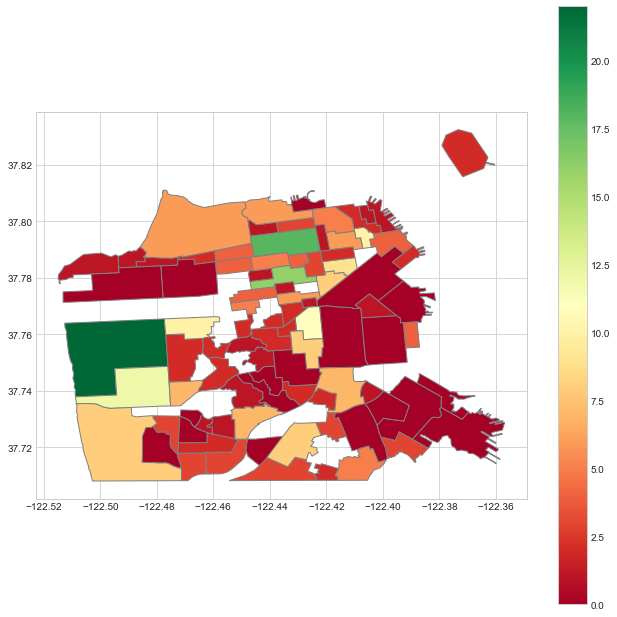

In [56]:
ax = SF_geom2.plot(column="Private",cmap = "RdYlGn", edgecolor = "gray", figsize = (11,11), legend = True)

In [ ]:
#Private schools are in green


In [63]:
#Looking at crime data, that specifically look at how a person was 


crimes_resolution = pd.read_sql("SELECT * FROM crime WHERE Resolution = 'ARREST, BOOKED'", data1)
crimes_resolution

,IncidntNum,Category,Descript,DayOfWeek,Datetime,PdDistrict,Resolution,Address,Lon,Lat
0,150098345,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Sunday,2015-02-01 14:00:00,MISSION,"ARREST, BOOKED",1700 Block of HARRISON ST,-122.413354,37.769075
1,150098345,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,2015-02-01 14:00:00,MISSION,"ARREST, BOOKED",1700 Block of HARRISON ST,-122.413354,37.769075
2,150098345,DRUG/NARCOTIC,POSSESSION OF NARCOTICS PARAPHERNALIA,Sunday,2015-02-01 14:00:00,MISSION,"ARREST, BOOKED",1700 Block of HARRISON ST,-122.413354,37.769075
3,150098345,WARRANTS,WARRANT ARREST,Sunday,2015-02-01 14:00:00,MISSION,"ARREST, BOOKED",1700 Block of HARRISON ST,-122.413354,37.769075
4,150098389,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Sunday,2015-02-01 16:38:00,BAYVIEW,"ARREST, BOOKED",3800 Block of 3RD ST,-122.387939,37.742260
5,150098408,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Sunday,2015-02-01 17:25:00,BAYVIEW,"ARREST, BOOKED",NEWCOMB AV / MENDELL ST,-122.389775,37.735227
6,150098414,ROBBERY,"ROBBERY ON THE STREET, STRONGARM",Sunday,2015-02-01 17:05:00,CENTRAL,"ARREST, BOOKED",PACIFIC AV / GRANT AV,-122.406832,37.796903
7,150098414,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,2015-02-01 17:05:00,CENTRAL,"ARREST, BOOKED",PACIFIC AV / GRANT AV,-122.406832,37.796903
8,150098414,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,2015-02-01 17:05:00,CENTRAL,"ARREST, BOOKED",PACIFIC AV / GRANT AV,-122.406832,37.796903
9,150098414,ASSAULT,BATTERY WITH SERIOUS INJURIES,Sunday,2015-02-01 17:05:00,CENTRAL,"ARREST, BOOKED",PACIFIC AV / GRANT AV,-122.406832,37.796903


,IncidntNum,Category,Descript,DayOfWeek,Datetime,PdDistrict,Resolution,Address,Lon,Lat
0,150060275,NON-CRIMINAL,LOST PROPERTY,Monday,2015-01-19 14:00:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.421582,37.761701
1,150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,2015-02-01 15:45:00,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191
2,150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,2015-02-01 15:45:00,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191
3,150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,2015-02-01 15:45:00,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191
4,150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,2015-01-27 19:00:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431119,37.800469
5,150098232,NON-CRIMINAL,AIDED CASE -PROPERTY FOR DESTRUCTION,Sunday,2015-02-01 16:21:00,RICHMOND,NONE,400 Block of LOCUST ST,-122.451782,37.787085
6,150098248,SECONDARY CODES,DOMESTIC VIOLENCE,Saturday,2015-01-31 21:00:00,BAYVIEW,NONE,700 Block of KIRKWOOD AV,-122.374019,37.729203
7,150098248,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Saturday,2015-01-31 21:00:00,BAYVIEW,NONE,700 Block of KIRKWOOD AV,-122.374019,37.729203
8,150098254,BURGLARY,"BURGLARY OF STORE, UNLAWFUL ENTRY",Saturday,2015-01-31 16:09:00,CENTRAL,NONE,200 Block of STOCKTON ST,-122.406568,37.787809
9,150098260,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Saturday,2015-01-31 17:00:00,CENTRAL,NONE,800 Block of GEARY ST,-122.417295,37.786258
